# The purpose of this project is to determine sentiments from sentences of a merged dataset of Imdb, yelp and amazon

## The purpose of this project is to predict class value of a car based on the quality of features provided in the dataset

## tool used for data visualization and merging: pandas

## tool used for data preprocessing : CountVectorizer method used for feature extraction from the provided dataset

## model used for prediction: Many different models are used to determine the accuracy difference among them and find the most efficient one

## tools used for data validation: the loss of the model was determined by binary cross entropy and the accruacry was measured by accuracy metrics

**Data Loading**

In [1]:
def download_data_from_UCI():
  !rm -rf 'sentiment labelled sentences'
  !rm -rf 'sentiment labelled sentences.zip'
  !rm -rf '__MACOSX'
  !wget https://archive.ics.uci.edu/ml/machine-learning-databases/00331/sentiment%20labelled%20sentences.zip
  !unzip 'sentiment labelled sentences.zip'

download_data_from_UCI()

--2020-11-11 01:42:54--  https://archive.ics.uci.edu/ml/machine-learning-databases/00331/sentiment%20labelled%20sentences.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84188 (82K) [application/x-httpd-php]
Saving to: ‘sentiment labelled sentences.zip’

sentiment labelled  100%[===================>]  82.21K  --.-KB/s    in 0.1s    

2020-11-11 01:42:54 (596 KB/s) - ‘sentiment labelled sentences.zip’ saved [84188/84188]

Archive:  sentiment labelled sentences.zip
   creating: sentiment labelled sentences/
  inflating: sentiment labelled sentences/.DS_Store  
   creating: __MACOSX/
   creating: __MACOSX/sentiment labelled sentences/
  inflating: __MACOSX/sentiment labelled sentences/._.DS_Store  
  inflating: sentiment labelled sentences/amazon_cells_labelled.txt  
  inflating: sentiment labelled sentences/imdb_labelle

In [2]:
!ls 'sentiment labelled sentences'/

amazon_cells_labelled.txt  imdb_labelled.txt  readme.txt  yelp_labelled.txt


In [3]:
import pandas as pd
amazon_df = pd.read_csv('sentiment labelled sentences/amazon_cells_labelled.txt', names=['sentence', 'label'], sep='\t')
amazon_df

,sentence,label
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
...,...,...
995,The screen does get smudged easily because it ...,0
996,What a piece of junk.. I lose more calls on th...,0
997,Item Does Not Match Picture.,0
998,The only thing that disappoint me is the infra...,0


In [4]:
import pandas as pd
imdb_df = pd.read_csv('sentiment labelled sentences/imdb_labelled.txt', names=['sentence', 'label'], sep='\t')
imdb_df

,sentence,label
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1
...,...,...
743,I just got bored watching Jessice Lange take h...,0
744,"Unfortunately, any virtue in this film's produ...",0
745,"In a word, it is embarrassing.",0
746,Exceptionally bad!,0


In [5]:
import pandas as pd
yelp_df = pd.read_csv('sentiment labelled sentences/yelp_labelled.txt', names=['sentence', 'label'], sep='\t')
yelp_df

,sentence,label
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [6]:
merged_df = pd.concat([amazon_df, imdb_df,yelp_df])
merged_df

,sentence,label
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


**Application of Machine Learning on Merged Dataset**

In [8]:
from sklearn.model_selection import train_test_split

merged_sentences = merged_df['sentence'].values
merged_y = merged_df['label'].values

merged_sentences_train, merged_sentences_test, merged_y_train, merged_y_test = train_test_split(merged_sentences, merged_y, test_size=0.25, random_state=42)
print("Merged Training sentense shape", merged_sentences_train.shape)
print("Merged Testing sentense shape", merged_sentences_test.shape)
print("Merged y_data matrix shape", merged_y_train.shape)
print("Merged y_test matrix shape", merged_y_test.shape)
print("Merged sentences_train: ",merged_sentences_train[0:10])
print("Merged y_train: ",merged_y_train)

Merged Training sentense shape (2061,)
Merged Testing sentense shape (687,)
Merged y_data matrix shape (2061,)
Merged y_test matrix shape (687,)
Merged sentences_train:  ['Were JERKS on the phone.'
 'Great time - family dinner on a Sunday night.' 'Very disappointing.  '
 'Great place to eat, reminds me of the little mom and pop shops in the San Francisco Bay Area.'
 "How this piece of trash was ever released is beyond me: the acting, the story, the characters, the supposedly special effects, etc...it's ALL wrong.  "
 'but the movie makes a lot of serious mistakes.  '
 '(The bathroom is just next door and very nice.)' "The food wasn't good."
 'A lot of websites have been rating this a very good phone and so do I.'
 'The handsfree part works fine, but then the car tries to download the address book, and the Treo reboots.Overall, I still rate this device high.']
Merged y_train:  [0 1 0 ... 1 1 0]


In [9]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer =  CountVectorizer(min_df=0, lowercase=False,stop_words='english') # will also remove punctuation or stop words
vectorizer.fit(merged_sentences_train)

Merged_X_train = vectorizer.transform(merged_sentences_train).toarray()
Merged_X_test  = vectorizer.transform(merged_sentences_test).toarray()

print("Training matrix shape", Merged_X_train.shape)
print("Testing matrix shape", Merged_X_test.shape)
print("Vocabulary: ",vectorizer.vocabulary_)
print("Vocabulary words: ",vectorizer.vocabulary_.keys())
print("Vocabulary index: ",vectorizer.vocabulary_.values())
print(Merged_X_train)

Training matrix shape (2061, 4729)
Testing matrix shape (687, 4729)
Vocabulary:  {'Were': 1208, 'JERKS': 590, 'phone': 3435, 'Great': 491, 'time': 4345, 'family': 2360, 'dinner': 2060, 'Sunday': 1039, 'night': 3257, 'Very': 1161, 'disappointing': 2077, 'place': 3459, 'eat': 2194, 'reminds': 3721, 'little': 3001, 'mom': 3174, 'pop': 3508, 'shops': 3967, 'San': 949, 'Francisco': 449, 'Bay': 166, 'Area': 117, 'How': 546, 'piece': 3448, 'trash': 4403, 'released': 3715, 'acting': 1272, 'story': 4166, 'characters': 1669, 'supposedly': 4240, 'special': 4093, 'effects': 2207, 'ALL': 60, 'wrong': 4707, 'movie': 3201, 'makes': 3066, 'lot': 3027, 'mistakes': 3164, 'The': 1074, 'bathroom': 1449, 'just': 2899, 'door': 2121, 'nice': 3253, 'food': 2468, 'wasn': 4609, 'good': 2571, 'websites': 4630, 'rating': 3645, 'handsfree': 2638, 'works': 4687, 'fine': 2415, 'car': 1618, 'tries': 4417, 'download': 2128, 'address': 1288, 'book': 1524, 'Treo': 1113, 'reboots': 3667, 'Overall': 808, 'rate': 3643, 'de

**Applying Logistic Regression**

In [10]:
from sklearn.linear_model import LogisticRegression

logistic_classifier = LogisticRegression()
logistic_classifier.fit(Merged_X_train, merged_y_train)
score = logistic_classifier.score(Merged_X_test, merged_y_test)
print("Accuracy of Merged logistic model:", score)

Accuracy of Merged logistic model: 0.7758369723435226


**Applying Neural Network**

In [11]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import Dropout,Activation
from keras.layers import BatchNormalization,Dense
from keras.regularizers import l2
from keras import initializers,Sequential
import numpy as np
keras_callbacks   = [
      EarlyStopping(monitor='val_loss', patience=10, mode='min', min_delta=0.0001),
      ModelCheckpoint('./checkmodel.h5', monitor='val_loss', save_best_only=True, mode='min')
]

def build_model(n_layers = 2, n_neurons = 1000,initializer='uniform'):
  
  if initializer == 'uniform':
    w_in = np.sqrt(0.001)
    initializer = initializers.RandomUniform(minval=-w_in, maxval=w_in)
  else:
    #https://www.tensorflow.org/api_docs/python/tf/keras/initializers/GlorotNormal
    initializer = initializers.glorot_normal()
  
  model = Sequential() # create Sequential model
  for i in range(n_layers-1):
      model.add(Dense(n_neurons, kernel_initializer=initializer))
      model.add(BatchNormalization()) ## add batch normalization before activation
      model.add(Activation('relu'))
      model.add(Dropout(0.2))
  model.add(Dense(1, activation = 'sigmoid', kernel_initializer=initializer)) 
  return model

merged_model = build_model(n_layers = 1, n_neurons = 10,initializer='uniform')
merged_model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ['accuracy'])

train_history_merged = merged_model.fit(Merged_X_train,merged_y_train, validation_split=0.1, batch_size = 5, epochs = 50, callbacks=keras_callbacks)

Epoch 1/50
371/371 [==============================] - 1s 3ms/step - loss: 0.6826 - accuracy: 0.6203 - val_loss: 0.6720 - val_accuracy: 0.6908
Epoch 2/50
371/371 [==============================] - 1s 2ms/step - loss: 0.6392 - accuracy: 0.8296 - val_loss: 0.6517 - val_accuracy: 0.7246
Epoch 3/50
371/371 [==============================] - 1s 2ms/step - loss: 0.5991 - accuracy: 0.8991 - val_loss: 0.6345 - val_accuracy: 0.7295
Epoch 4/50
371/371 [==============================] - 1s 2ms/step - loss: 0.5628 - accuracy: 0.9148 - val_loss: 0.6198 - val_accuracy: 0.7391
Epoch 5/50
371/371 [==============================] - 1s 2ms/step - loss: 0.5302 - accuracy: 0.9261 - val_loss: 0.6056 - val_accuracy: 0.7536
Epoch 6/50
371/371 [==============================] - 1s 2ms/step - loss: 0.5006 - accuracy: 0.9347 - val_loss: 0.5925 - val_accuracy: 0.7729
Epoch 7/50
371/371 [==============================] - 1s 2ms/step - loss: 0.4740 - accuracy: 0.9374 - val_loss: 0.5814 - val_accuracy: 0.7681
Epoch 

In [12]:
print("Accuracy of Merged neural network model:", merged_model.evaluate(Merged_X_test, merged_y_test)[1])

22/22 [==============================] - 0s 2ms/step - loss: 0.4663 - accuracy: 0.7802
Accuracy of Merged neural network model: 0.7802037596702576


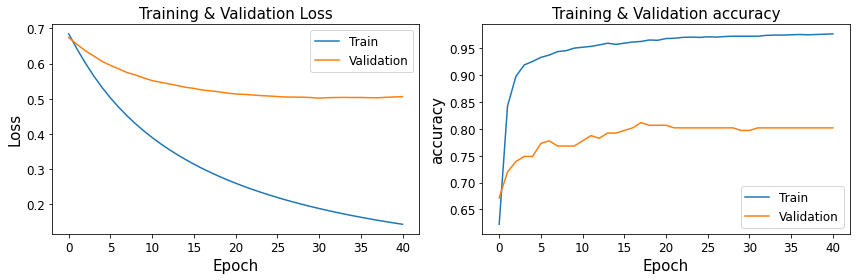

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
# Plot training & validation loss values
plt.plot(train_history_merged.history['loss'], label='Train')
plt.plot(train_history_merged.history['val_loss'], label='Validation')
plt.title('Training & Validation Loss', fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.xlabel('Epoch', fontsize=15)
plt.xticks( fontsize=12)
plt.yticks( fontsize=12)
plt.legend(loc='upper right', fontsize=12)


plt.subplot(1,2,2)
# Plot training & validation accuracy values
plt.plot(train_history_merged.history['accuracy'], label='Train')
plt.plot(train_history_merged.history['val_accuracy'], label='Validation')
plt.title('Training & Validation accuracy', fontsize=15)
plt.ylabel('accuracy', fontsize=15)
plt.xlabel('Epoch', fontsize=15)
plt.xticks( fontsize=12)
plt.yticks( fontsize=12)
plt.legend(loc='lower right', fontsize=12)

plt.tight_layout()
plt.show()

**Word Embedding: Rerepresent each word as a vector.**

In [13]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=5000) 
tokenizer.fit_on_texts(merged_sentences_train[0:5])

Merged_X_train = tokenizer.texts_to_sequences(merged_sentences_train[0:5])
print(merged_sentences_train[0:5])
print(Merged_X_train)

print("Word frequency: ")
tokenizer.word_index

['Were JERKS on the phone.'
 'Great time - family dinner on a Sunday night.' 'Very disappointing.  '
 'Great place to eat, reminds me of the little mom and pop shops in the San Francisco Bay Area.'
 "How this piece of trash was ever released is beyond me: the acting, the story, the characters, the supposedly special effects, etc...it's ALL wrong.  "]
[[6, 7, 2, 1, 8], [3, 9, 10, 11, 2, 12, 13, 14], [15, 16], [3, 17, 18, 19, 20, 4, 5, 1, 21, 22, 23, 24, 25, 26, 1, 27, 28, 29, 30], [31, 32, 33, 5, 34, 35, 36, 37, 38, 39, 4, 1, 40, 1, 41, 1, 42, 1, 43, 44, 45, 46, 47, 48, 49]]
Word frequency: 


{'a': 12,
 'acting': 40,
 'all': 48,
 'and': 23,
 'area': 30,
 'bay': 29,
 'beyond': 39,
 'characters': 42,
 'dinner': 11,
 'disappointing': 16,
 'eat': 19,
 'effects': 45,
 'etc': 46,
 'ever': 36,
 'family': 10,
 'francisco': 28,
 'great': 3,
 'how': 31,
 'in': 26,
 'is': 38,
 "it's": 47,
 'jerks': 7,
 'little': 21,
 'me': 4,
 'mom': 22,
 'night': 14,
 'of': 5,
 'on': 2,
 'phone': 8,
 'piece': 33,
 'place': 17,
 'pop': 24,
 'released': 37,
 'reminds': 20,
 'san': 27,
 'shops': 25,
 'special': 44,
 'story': 41,
 'sunday': 13,
 'supposedly': 43,
 'the': 1,
 'this': 32,
 'time': 9,
 'to': 18,
 'trash': 34,
 'very': 15,
 'was': 35,
 'were': 6,
 'wrong': 49}

**Padding sequences to the same length**

In [14]:
from keras.preprocessing.sequence import pad_sequences
maxlen = 100  # specify how long the sequences should be. This cuts sequences that exceed that number.
Merged_X_train_pad = pad_sequences(Merged_X_train, padding='post', maxlen=maxlen)
Merged_X_test_pad = pad_sequences(Merged_X_test, padding='post', maxlen=maxlen)

Merged_X_train_pad

array([[ 6,  7,  2,  1,  8,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 3,  9, 10, 11,  2, 12, 13, 14,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [15, 16,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0

In [15]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(merged_sentences_train)

Merged_X_train = tokenizer.texts_to_sequences(merged_sentences_train)
Merged_X_test = tokenizer.texts_to_sequences(merged_sentences_test)
from keras.preprocessing.sequence import pad_sequences
maxlen = 100
Merged_X_train_pad = pad_sequences(Merged_X_train, padding='post', maxlen=maxlen)
Merged_X_test_pad = pad_sequences(Merged_X_test, padding='post', maxlen=maxlen)
Merged_X_train_pad

array([[  49, 1860,   18, ...,    0,    0,    0],
       [  20,   39,  236, ...,    0,    0,    0],
       [  17,  349,    0, ...,    0,    0,    0],
       ...,
       [  41,   67,   20, ...,    0,    0,    0],
       [  21,    7,   27, ...,    0,    0,    0],
       [ 271,   39,  615, ...,    0,    0,    0]], dtype=int32)

**Feature generation option : one-hot encoding**

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse=False,handle_unknown = 'ignore')

all_labels = Merged_X_train_pad.reshape(-1,)
all_labels
enc.fit(all_labels.reshape(len(all_labels),1))  

Merged_X_train_pad_onehot = []
for sentence in Merged_X_train_pad:
    Merged_X_train_pad_onehot.append(enc.transform(sentence.reshape(maxlen,1)))

Merged_X_test_pad_onehot = []
for sentence in Merged_X_test_pad:
    Merged_X_test_pad_onehot.append(enc.transform(sentence.reshape(maxlen,1)))

Merged_X_train_pad_onehot = np.asarray(Merged_X_train_pad_onehot)
Merged_X_test_pad_onehot = np.asarray(Merged_X_test_pad_onehot)

**Word embedding layer**

**Using word embedding in Keras**

**Add 1D convolutional neural network**

**Recurrent Neural Network**

**Architecture 1: Embedding + LSTM + Sigmod classification**

**Architecture 1: Embedding + LSTM layer + Sigmod classification**

**Architecture 2: Embedding + MaxPooling + LSTM layer + Sigmod classification**

**Architecture 3: Embedding + Conv1D+ LSTM layer + Sigmod classification**